# **Análise de Dados com Microdados do ENEM**

## IMPORTAÇÃO LIBS

In [1]:
#Impoerting libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

# limiting the number of columns to display
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

## IMPORTAÇÃO DATASET

In [2]:
df_raw = pd.read_csv('Data_for_ENEM.csv', sep=';',  encoding='utf-8')

## EXPLORANDO DATASET

In [3]:
# Cnferindo o tamanho do dataframe
df_raw.shape

(1048575, 76)

In [4]:
# Visualizing the dataframe
df_raw.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4305108,Caxias do Sul,43,RS,1,1,1,1,1221.0,1193.0,1204.0,1211.0,502.0,4989.0,4756.0,3632.0,DBEBDCECCBCEBBBBDBABDDBBAABCBACDBACECCBAADEBB,ABDEADAADCDABDCADAEABCDDCBAADCCBEBCEBEBDBEAED,ACEBDCABAACAEBAECEBBBAAECBBDEADCAECCCEDDABEED,CEAEACCCDABCDAACEDDBAAEBABDDEEBDAECABDBCBCADE,1,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCCEAAECBBEBCA...,BCCDEEABCBEDCEABBEBDABDDADDADECAADDCCBEBEABCC,1.0,140.0,200.0,100.0,120.0,140.0,700.0,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,1.0,0,2304400.0,Fortaleza,23.0,CE,2.0,1.0,1.0,2304400,Fortaleza,23,CE,1,1,1,1,1224.0,1192.0,1202.0,1214.0,459.0,5085.0,5072.0,4667.0,DEEBEACCCEBDDBDCCCAEEDCBAAADBCBEEEDCDAAECBEEC,DDAAEEBCCDEADBCDDCBAECABEBDEBDABECECEDCDDAEED,ADBDADAEEEACAABBACADCAEBBAAEBBCDEBBDDADDCADAA,EECBAEDEEDDDBBAADEECDBBBECEAACEAEECDBEDDBCDCB,0,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.0,140.0,200.0,160.0,180.0,200.0,880.0,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,1.0,0,2311306.0,Quixadá,23.0,CE,2.0,1.0,1.0,2311306,Quixadá,23,CE,1,1,1,1,1222.0,1191.0,1201.0,1212.0,4025.0,3792.0,4469.0,3383.0,AECCEAACDEABEEECDBAEEAAADDEABCBCEBACEEDCBEABD,CADEBCEDDEBCBAEBADDCECACADBDEBABDBDBEEDBBEADC,AABBACBCAEDABDADEDAACCAEEEECAACDCADBAEACDEAAE,CDBABEDCEEBBBDECDEBACCAABDEDCBECDECABBDBDEECC,0,CAAADCCCCDDDABDCACDBEEEDCEDAEECCDBEABDBABBAEB,CDAEECABAACEAADECBDAABCDCABADCDEABAABCDDEBADB,BBDABAAEBADACEEDCCDBADBDEDCCEBCACEACAACAACACBB...,DCECACCBDECBEEABEABDDAADDABBBCCBCCDDAEBDADEEB,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
5,210058061539,2023,6,F,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913606,Ilhéus,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,D,B,3,C,A,B,B,A,A,B,A,B,A,B,A,A,B,A,A,C,A,A,B
6,210059855122,2023,11,F,1,3,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2611101,Petrolina,26,PE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,B,A,1,C,A,B,B,A,A,B,A,A,A,B,A,A,B,A,B,B,A,A,B
7,210058387333,2023,11,M,1,3,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3127701,Governador Valadares,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,1,A,A,B,C,A,A,B,A,B,A,B,A,A,A,A,A,B,A,B,B
8,210059085137,2023,5,F,1

In [5]:
# Visualizando os estados
df_raw.NO_MUNICIPIO_PROVA.unique().tolist()

['Brasília',
 'Caxias do Sul',
 'Fortaleza',
 'Quixadá',
 'Ilhéus',
 'Petrolina',
 'Governador Valadares',
 'Salvador',
 'Batatais',
 'Natal',
 'Ubiratã',
 'Feira de Santana',
 'São Paulo',
 'Recife',
 'Caraúbas',
 'Belém',
 'Raposa',
 'Londrina',
 'São João del Rei',
 'Campinas',
 'Alfenas',
 'Sabará',
 'Maringá',
 'Santa Inês',
 'Santa Luzia',
 'Timon',
 'Duque de Caxias',
 'Jaciara',
 'Belo Horizonte',
 'Aracaju',
 'Caucaia',
 'Marituba',
 'Serra',
 'Cachoeiras de Macacu',
 'Presidente Tancredo Neves',
 'Timóteo',
 'Ipatinga',
 'Nilópolis',
 'Pelotas',
 'Itapipoca',
 'Blumenau',
 'Rio Branco',
 'São Caitano',
 'São Sebastião do Passé',
 'Uberlândia',
 'Itaperuna',
 'Manaus',
 'São Cristóvão',
 'Rio de Janeiro',
 'Carpina',
 'Santos Dumont',
 'Ivaiporã',
 'Pio XII',
 'Vitória',
 'Araguaína',
 'Brumado',
 'Acará',
 'Medianeira',
 'Codajás',
 'Divinópolis',
 'Pinhais',
 'Campos dos Goytacazes',
 'Vitória da Conquista',
 'Amambai',
 'Camaçari',
 'Teresina',
 'Igarapé-Miri',
 'São Gonçal

Como a visualização é limitada, então fiz um filtro:

In [6]:
df_raw[df_raw.NO_MUNICIPIO_PROVA == 'Vitória da Conquista'].head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
81,210061103946,2023,3,F,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,1224.0,1192.0,1202.0,1214.0,3244.0,5075.0,4314.0,4224.0,EDCBBABC.ADABDEBDECCAABBEDBCCECDEBDCBCEBDACCB,DAACAEBBCADDBEDCDCBAABEBABDADDEEDADEACADEABCD,BCAEBBBEEEEDEDDBABBCBDCEACABECBBAEEDDAAABDCBA,EDCDCCDEEBCCACCDACEBDDAECAEDBDDECCEECDCDAAEBA,1,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,6.0,0.0,0.0,0.0,0.0,0.0,0.0,B,E,C,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,B,A,B,B
141,210058387335,2023,8,F,2,3,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,1221.0,1193.0,1204.0,1211.0,5515.0,5314.0,5162.0,4484.0,DBEEEDBEBDACCBCCACDCCEDCDBEEEAEBBACDECADCCDEB,AEEEBBAADCDAAEAACCAABEDEABDCDABBADACDDBDACDDD,ABABEBAECBCDEDBCDADBCABBCEACD.EAABBCBEEBABADB,CCDCDEBAACCDDBECDEDDBCDECACDDCCECCDAEBCDACDCE,0,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCCEAAECBBEBCA...,BCCDEEABCBEDCEABBEBDABDDADDADECAADDCCBEBEABCC,1.0,120.0,160.0,120.0,120.0,100.0,620.0,H,B,F,B,4,C,A,B,D,A,A,B,A,B,A,B,A,A,B,A,A,C,A,A,B
349,210059980960,2023,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,1222.0,1191.0,1201.0,1212.0,452.0,6029.0,5764.0,6894.0,CDDEDDBAADBABECCAEDBECAAEECCABECDBDEDABDEBDBA,CBAECCABACCEAAAECBDAABCDEABAECDACDECBCCDCBCDC,BCDABCADAEDBCCBADBADACBEDBACDAECBCAADAABBEAAE,DCECACBBEBAEEADBEDECDEADAABACCCBBCADDEEEDDCEB,0,CAAADCCCCDDDABDCACDBEEEDCEDAEECCDBEABDBABBAEB,CDAEECABAACEAADECBDAABCDCABADCDEABAABCDDEBADB,BBDABAAEBADACEEDCCDBADBDEDCCEBCACEACAACAACACBB...,DCECACCBDECBEEABEABDDAADDABBBCCBCCDDAEBDADEEB,1.0,160.0,200.0,120.0,160.0,180.0,820.0,C,E,C,D,4,D,A,B,C,B,B,B,B,B,A,A,A,A,B,A,A,E,A,A,B
694,210059974483,2023,8,M,1,1,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,C,A,A,4,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
814,210059897899,2023,6,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,1224.0,1192.0,1202.0,1214.0,5274.0,5575.0,5579.0,4915.0,ADBCEAEDBDBECDDAEADCADEDDABBECCCAECEBBACDECDA,DBADDEECCDCBBBBEABDBDCEABADECBDCECEABCEDAABCC,ADADACAEAEDDECBDEDBEAAADADADBBBEDBCCACABEDCAC,EDABDDDEAECDBDBDEADCECCACECCBBCBCDEACBDACEBDC,1,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.0,120.0,120.0,120.0,120.0,80.0,560.0,E,E,B,B,3,D,A,B,D,A,A,B,A,B,A,B,A,A,B,A,A,D,A,A,B
840,210061347492,2023,11,F,1,3,1,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,1223.0,1194.0,1203.0,1213.0,4416.0,4645.0,515.0,553.0,CBDCCAABDEEAAEEDAECABBCAECAAEBCEEBABCBCEBAECC,ABCCCADDCEAEACAACBBDCADBEDABECBADECBBCADEBBDA,B.BDEAADDBBBAACABAECEDDBACCBDDDDBDDDDACDEABEC,EEDBEAEAAEDCCCCAABBADDBEBBECEAACBBDEBBCDEACCD,1,CEDAEEDEECCEBAD

In [7]:
# Variavel para apenas os dados de pessoas que fizeram a prova em Vitória da Conquista
df = df_raw[df_raw.NO_MUNICIPIO_PROVA == 'Vitória da Conquista']

In [8]:
# Verificando se somente a cidade de Vitória da Conquista está na base
df.NO_MUNICIPIO_PROVA.unique()

array(['Vitória da Conquista'], dtype=object)

In [9]:
# Verificando o tamanho do dataframe novamente
df.shape

(3321, 76)

In [10]:
# vberficando os valores nulos
df.isnull().sum()

NU_INSCRICAO                 0
NU_ANO                       0
TP_FAIXA_ETARIA              0
TP_SEXO                      0
TP_ESTADO_CIVIL              0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 2417
IN_TREINEIRO                 0
CO_MUNICIPIO_ESC          2872
NO_MUNICIPIO_ESC          2872
CO_UF_ESC                 2872
SG_UF_ESC                 2872
TP_DEPENDENCIA_ADM_ESC    2872
TP_LOCALIZACAO_ESC        2872
TP_SIT_FUNC_ESC           2872
CO_MUNICIPIO_PROVA           0
NO_MUNICIPIO_PROVA           0
CO_UF_PROVA                  0
SG_UF_PROVA                  0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
CO_PROVA_CN                908
CO_PROVA_CH                817
CO_PROVA_LC                817
CO_PROVA_MT                908
NU_NOTA_CN                 908
NU_NOTA_

In [11]:
#Dropando as colunas que não serão utilizadas
df.drop(columns=['TP_ENSINO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC'], inplace=True)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
# Tamanho do dataframe após o drop
df.shape

(3321, 68)

In [13]:
# Conferindo os tipos dos dados
df.dtypes

NU_INSCRICAO            int64
NU_ANO                  int64
TP_FAIXA_ETARIA         int64
TP_SEXO                object
TP_ESTADO_CIVIL         int64
TP_COR_RACA             int64
TP_NACIONALIDADE        int64
TP_ST_CONCLUSAO         int64
TP_ANO_CONCLUIU         int64
TP_ESCOLA               int64
IN_TREINEIRO            int64
CO_MUNICIPIO_PROVA      int64
NO_MUNICIPIO_PROVA     object
CO_UF_PROVA             int64
SG_UF_PROVA            object
TP_PRESENCA_CN          int64
TP_PRESENCA_CH          int64
TP_PRESENCA_LC          int64
TP_PRESENCA_MT          int64
CO_PROVA_CN           float64
CO_PROVA_CH           float64
CO_PROVA_LC           float64
CO_PROVA_MT           float64
NU_NOTA_CN            float64
NU_NOTA_CH            float64
NU_NOTA_LC            float64
NU_NOTA_MT            float64
TX_RESPOSTAS_CN        object
TX_RESPOSTAS_CH        object
TX_RESPOSTAS_LC        object
TX_RESPOSTAS_MT        object
TP_LINGUA               int64
TX_GABARITO_CN         object
TX_GABARIT

## ANÁLISE DE QUALIDADE DOS DADOS

In [14]:
# Conferindo a idade min e max
df.TP_FAIXA_ETARIA.agg([np.min, np.max])

amin     1
amax    17
Name: TP_FAIXA_ETARIA, dtype: int64

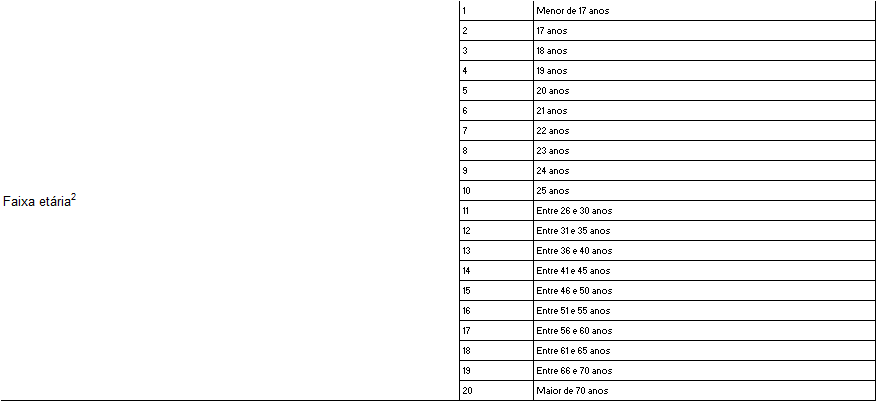

Segundo o dicionario 1, são pessoas menor de 17 anos ou seja treineiros e 2 = 17 anos, ou seja pessoas finalizando ensino medio, prestes a fazer 18

Como não é possievel sair do ensino medio com menos de 18 anos. Então 1 é considerado treineiros

In [15]:
df['TP_FAIXA_ETARIA'].value_counts()

3     702
4     513
2     454
5     341
6     227
11    183
1     163
7     159
8     134
9     105
12     92
10     88
13     73
14     45
15     30
16      9
17      3
Name: TP_FAIXA_ETARIA, dtype: int64

## Treineiros

In [16]:
df_treineiros = df[df['TP_FAIXA_ETARIA'] == 1]

In [17]:
# Conferindo se a faixa etaria é 1
df_treineiros.TP_FAIXA_ETARIA.unique()

array([1], dtype=int64)

In [18]:
# Numero total de trineiros
df_treineiros.shape[0]

163

In [19]:
# Conferindo de que tipo de escolas esses alunos vieram
df_treineiros.TP_ESCOLA.value_counts()

1    157
2      4
3      2
Name: TP_ESCOLA, dtype: int64

PARA UMA MELHOR VISUALIZAÇÃO:

In [20]:
df_treineiros[df_treineiros['TP_ESCOLA'].isin([1,2,3])]['TP_ESCOLA'].map({1:'Não Respondeu', 2:'Pública', 3: 'Privada'}).value_counts()

Não Respondeu    157
Pública            4
Privada            2
Name: TP_ESCOLA, dtype: int64

In [21]:
# Identificando total de faltas por materia pelos 'Treineiros'
df_presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC', 'TP_PRESENCA_MT']
codigo_falta = 0
contagem_de_faltas_de_cada_aluno = (df_treineiros[df_presenca] == codigo_falta).sum()
print(contagem_de_faltas_de_cada_aluno)

TP_PRESENCA_CN    19
TP_PRESENCA_CH    14
TP_PRESENCA_LC    14
TP_PRESENCA_MT    19
dtype: int64


In [22]:
#Excluinto TREINEIRO = 
df = df[df['TP_FAIXA_ETARIA'] != 1]

In [23]:
# Conferindo se a exclusao ocorreu
df.TP_FAIXA_ETARIA.value_counts()

3     702
4     513
2     454
5     341
6     227
11    183
7     159
8     134
9     105
12     92
10     88
13     73
14     45
15     30
16      9
17      3
Name: TP_FAIXA_ETARIA, dtype: int64

AGORA QUE OS TREINEIROS FORA RETIRADOPS DO DF VAMOS PROSSEGUIR

## ANALISES MACROS

### CARACTERISCAS DOS CANDIDATOS

Para uma visão geral dos dados, será tirada as notas somente dos alunos presentes, sem considerar a nota da redação

In [24]:
# Visualização geral das informações
df.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,3.158000e+03,3158.0,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.0,3158.0,3158.000000,3158.000000,3158.000000,3158.000000,2269.000000,2355.000000,2355.000000,2269.000000,2269.000000,2355.000000,2355.000000,2269.000000,3158.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,3158.000000
mean,2.100598e+11,2023.0,5.536415,1.045282,2.204560,1.030082,1.433502,2.524699,1.341672,0.059215,2933307.0,29.0,0.719759,0.748258,0.748258,0.719759,1222.556192,1192.591083,1202.609766,1212.556633,4526.022477,4806.454352,4752.684076,4879.698105,0.470234,1.087898,127.583864,150.148620,127.286624,138.377919,119.796178,663.193206,3.627929
std,9.066785e+05,0.0,3.394704,0.379439,0.953771,0.207663,0.631136,4.060267,0.558953,0.236063,0.0,0.0,0.450596,0.436991,0.436991,0.450596,2.640420,2.565142,2.571689,2.653902,1637.875751,1725.854586,1581.455115,1890.855372,0.499192,0.618603,32.568809,48.165355,41.335817,41.618711,60.552196,204.279602,1.447838
min,2.100581e+11,2023.0,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2933307.0,29.0,0.000000,0.000000,0.000000,0.000000,1221.000000,1191.000000,1201.000000,1211.000000,0.000000,0.000000,299.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.100591e+11,2023.0,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2933307.0,29.0,0.000000,0.000000,0.000000,0.000000,1221.000000,1192.000000,1202.000000,1211.000000,4226.000000,4449.500000,4521.000000,4048.000000,0.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,3.000000
50%,2.100598e+11,2023.0,4.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2933307.0,29.0,1.000000,1.000000,1.000000,1.000000,1222.000000,1193.000000,1203.000000,1212.000000,4864.000000,5259.000000,5182.000000,5009.000000,0.000000,1.000000,120.000000,160.000000,120.000000,140.000000,120.000000,660.000000,4.000000
75%,2.100605e+11,2023.0,7.000000,1.000000,3.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2933307.0,29.0,1.000000,1.000000,1.000000,1.000000,1223.000000,1193.000000,1204.000000,1213.000000,5496.000000,5886.000000,5674.500000,6168.000000,1.000000,1.000000,160.000000,200.000000,160.000000,180.000000,180.000000,840.000000,4.000000
max,2.100615e+11,2023.0,17.000000,4.000000,5.000000,4.000000,4.000000,17.000000,3.000000,1.000000,2933307.0,29.0,2.000000,2.000000,2.000000,2.000000,1303.000000,1272.000000,1282.000000,1294.000000,8211.000000,7835.000000,7558.000000,9021.000000,1.000000,8.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000,16.000000


In [25]:
df.TP_PRESENCA_CH.value_counts()

1    2355
0     799
2       4
Name: TP_PRESENCA_CH, dtype: int64

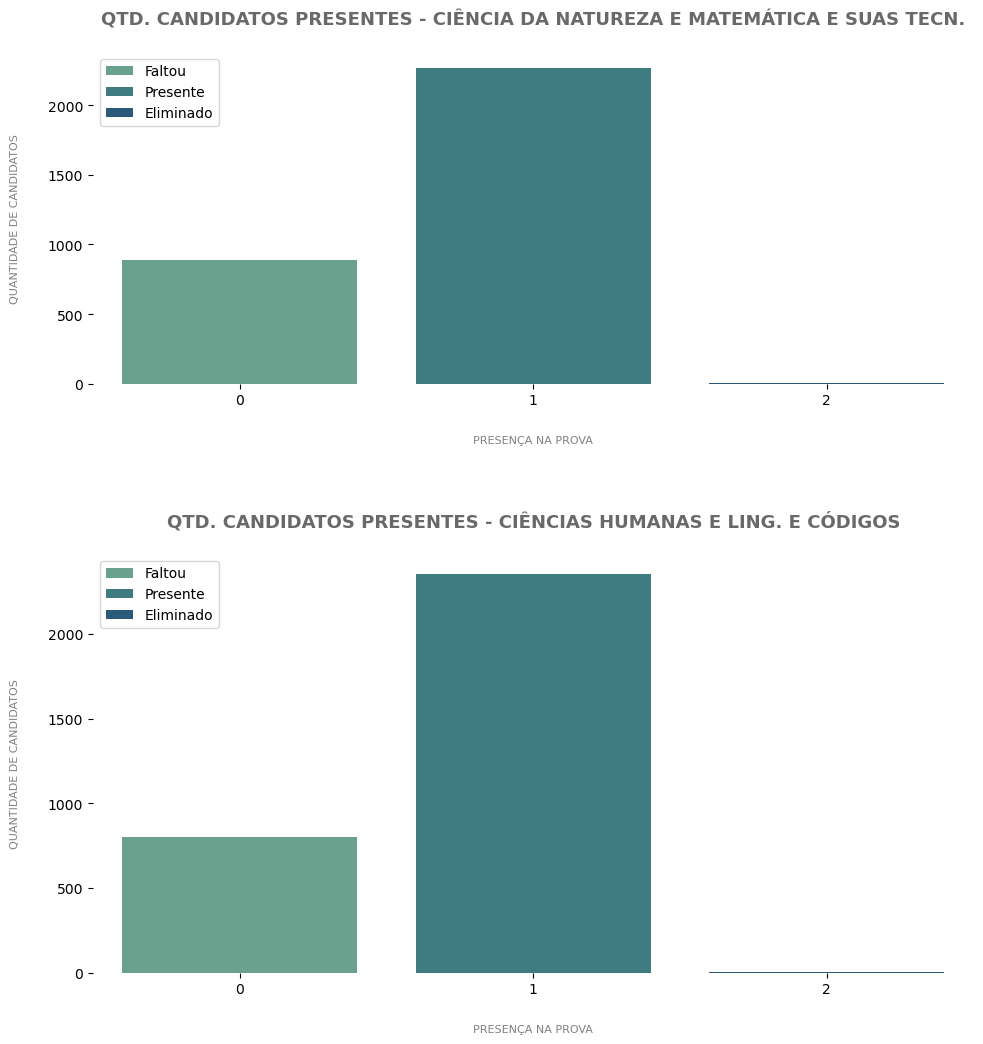

In [26]:
plt.figure(figsize=(25, 25))
ax2 = plt.subplot(4, 2, 3)
ax2 = sns.countplot(x = 'TP_PRESENCA_CH', data = df, palette = 'crest', hue = 'TP_PRESENCA_CH', dodge = False)
ax2 = plt.title('QTD. CANDIDATOS PRESENTES - CIÊNCIAS HUMANAS E LING. E CÓDIGOS', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax2 = sns.despine(bottom = True, left=True)
ax2 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.legend(loc = 2, labels=['Faltou', 'Presente', 'Eliminado'])

#######

ax1 = plt.subplot(5,2,1)
ax1 = sns.countplot( x = 'TP_PRESENCA_MT', data= df, palette= 'crest', hue='TP_PRESENCA_MT', dodge= False)
ax1 = plt.title('QTD. CANDIDATOS PRESENTES - CIÊNCIA DA NATUREZA E MATEMÁTICA E SUAS TECN.', pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax1 = sns.despine(bottom=True, left= True)
ax1 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.legend(loc = 2, labels=['Faltou', 'Presente', 'Eliminado'])

**OBS**
1. O ENEM é um exame abrangente que avalia o conhecimento dos estudantes em diferentes áreas. Dividido em duas etapas, ocorre em dois dias: no primeiro, abrange Linguagens, Ciências Humanas e a redação; no segundo, Matemática e Ciências da Natureza.
2.  Os candidatos tendem a faltar no primeiro dia de prova e serem eliminados com maior frequencia no segundo dia de prova.

## IDADE X SEXO

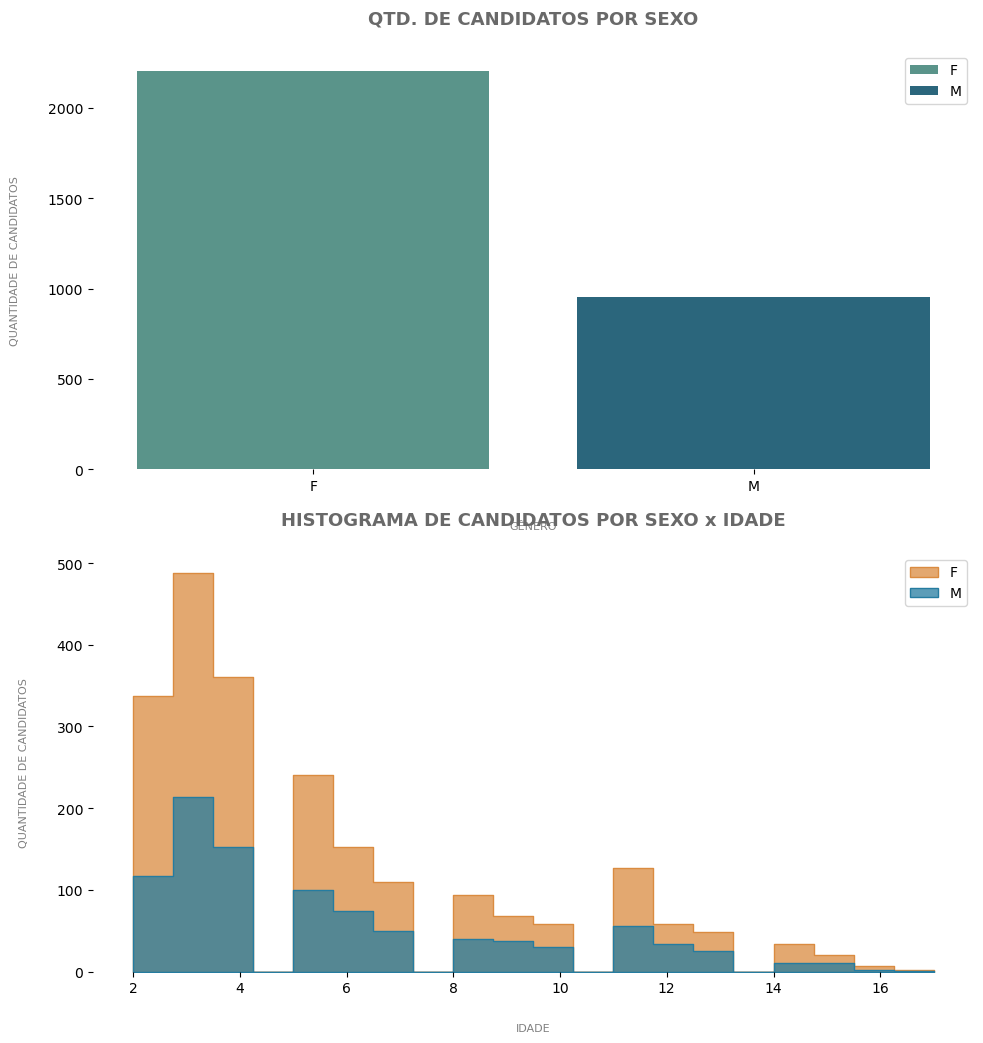

In [27]:
plt.figure(figsize=(25,25))
s1 = plt.subplot(4,2,1)
s1 = sns.countplot(x = 'TP_SEXO', data = df, palette= 'crest',
                hue = 'TP_SEXO', dodge= False
                )
s1 = plt.title('QTD. DE CANDIDATOS POR SEXO', pad = 20, fontsize = 13,
               color = 'dimgrey', fontweight = 'bold'
               )
s1 = sns.despine(bottom= True, left = False)
s1 = plt.xlabel('GÊNERO', color = 'grey', labelpad= 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20,
                fontsize = 8
                )
s1 = plt.legend(loc = 1, labels = ['F', 'M'])

############

s2 = plt.subplot(4,2,3)
sns.histplot(df[df['TP_SEXO'] == 'F']['TP_FAIXA_ETARIA'], bins = 20,
                label = 'F', element= 'step', color= '#da8b40')
sns.histplot(df[df['TP_SEXO'] == 'M']['TP_FAIXA_ETARIA'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')
s2 = plt.title('HISTOGRAMA DE CANDIDATOS POR SEXO x IDADE',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

**Conclusão**
1. Predominância Feminina:
Há uma quantidade significativamente maior de candidatas do sexo feminino realizando as provas em comparação aos candidatos do sexo masculino.

2. Faixa Etária Predominante:
A maior concentração de candidatas está entre 17 e 18 anos, o que representa o principal grupo etário participante.

3. Distribuição em Outras Faixas Etárias:
Mesmo em outras faixas etárias, as mulheres continuam sendo maioria, indicando uma maior participação feminina de forma geral.

4. Participação Masculina:
Os homens estão em menor número em praticamente todas as faixas etárias analisadas.

## ENSINO MÉDIO

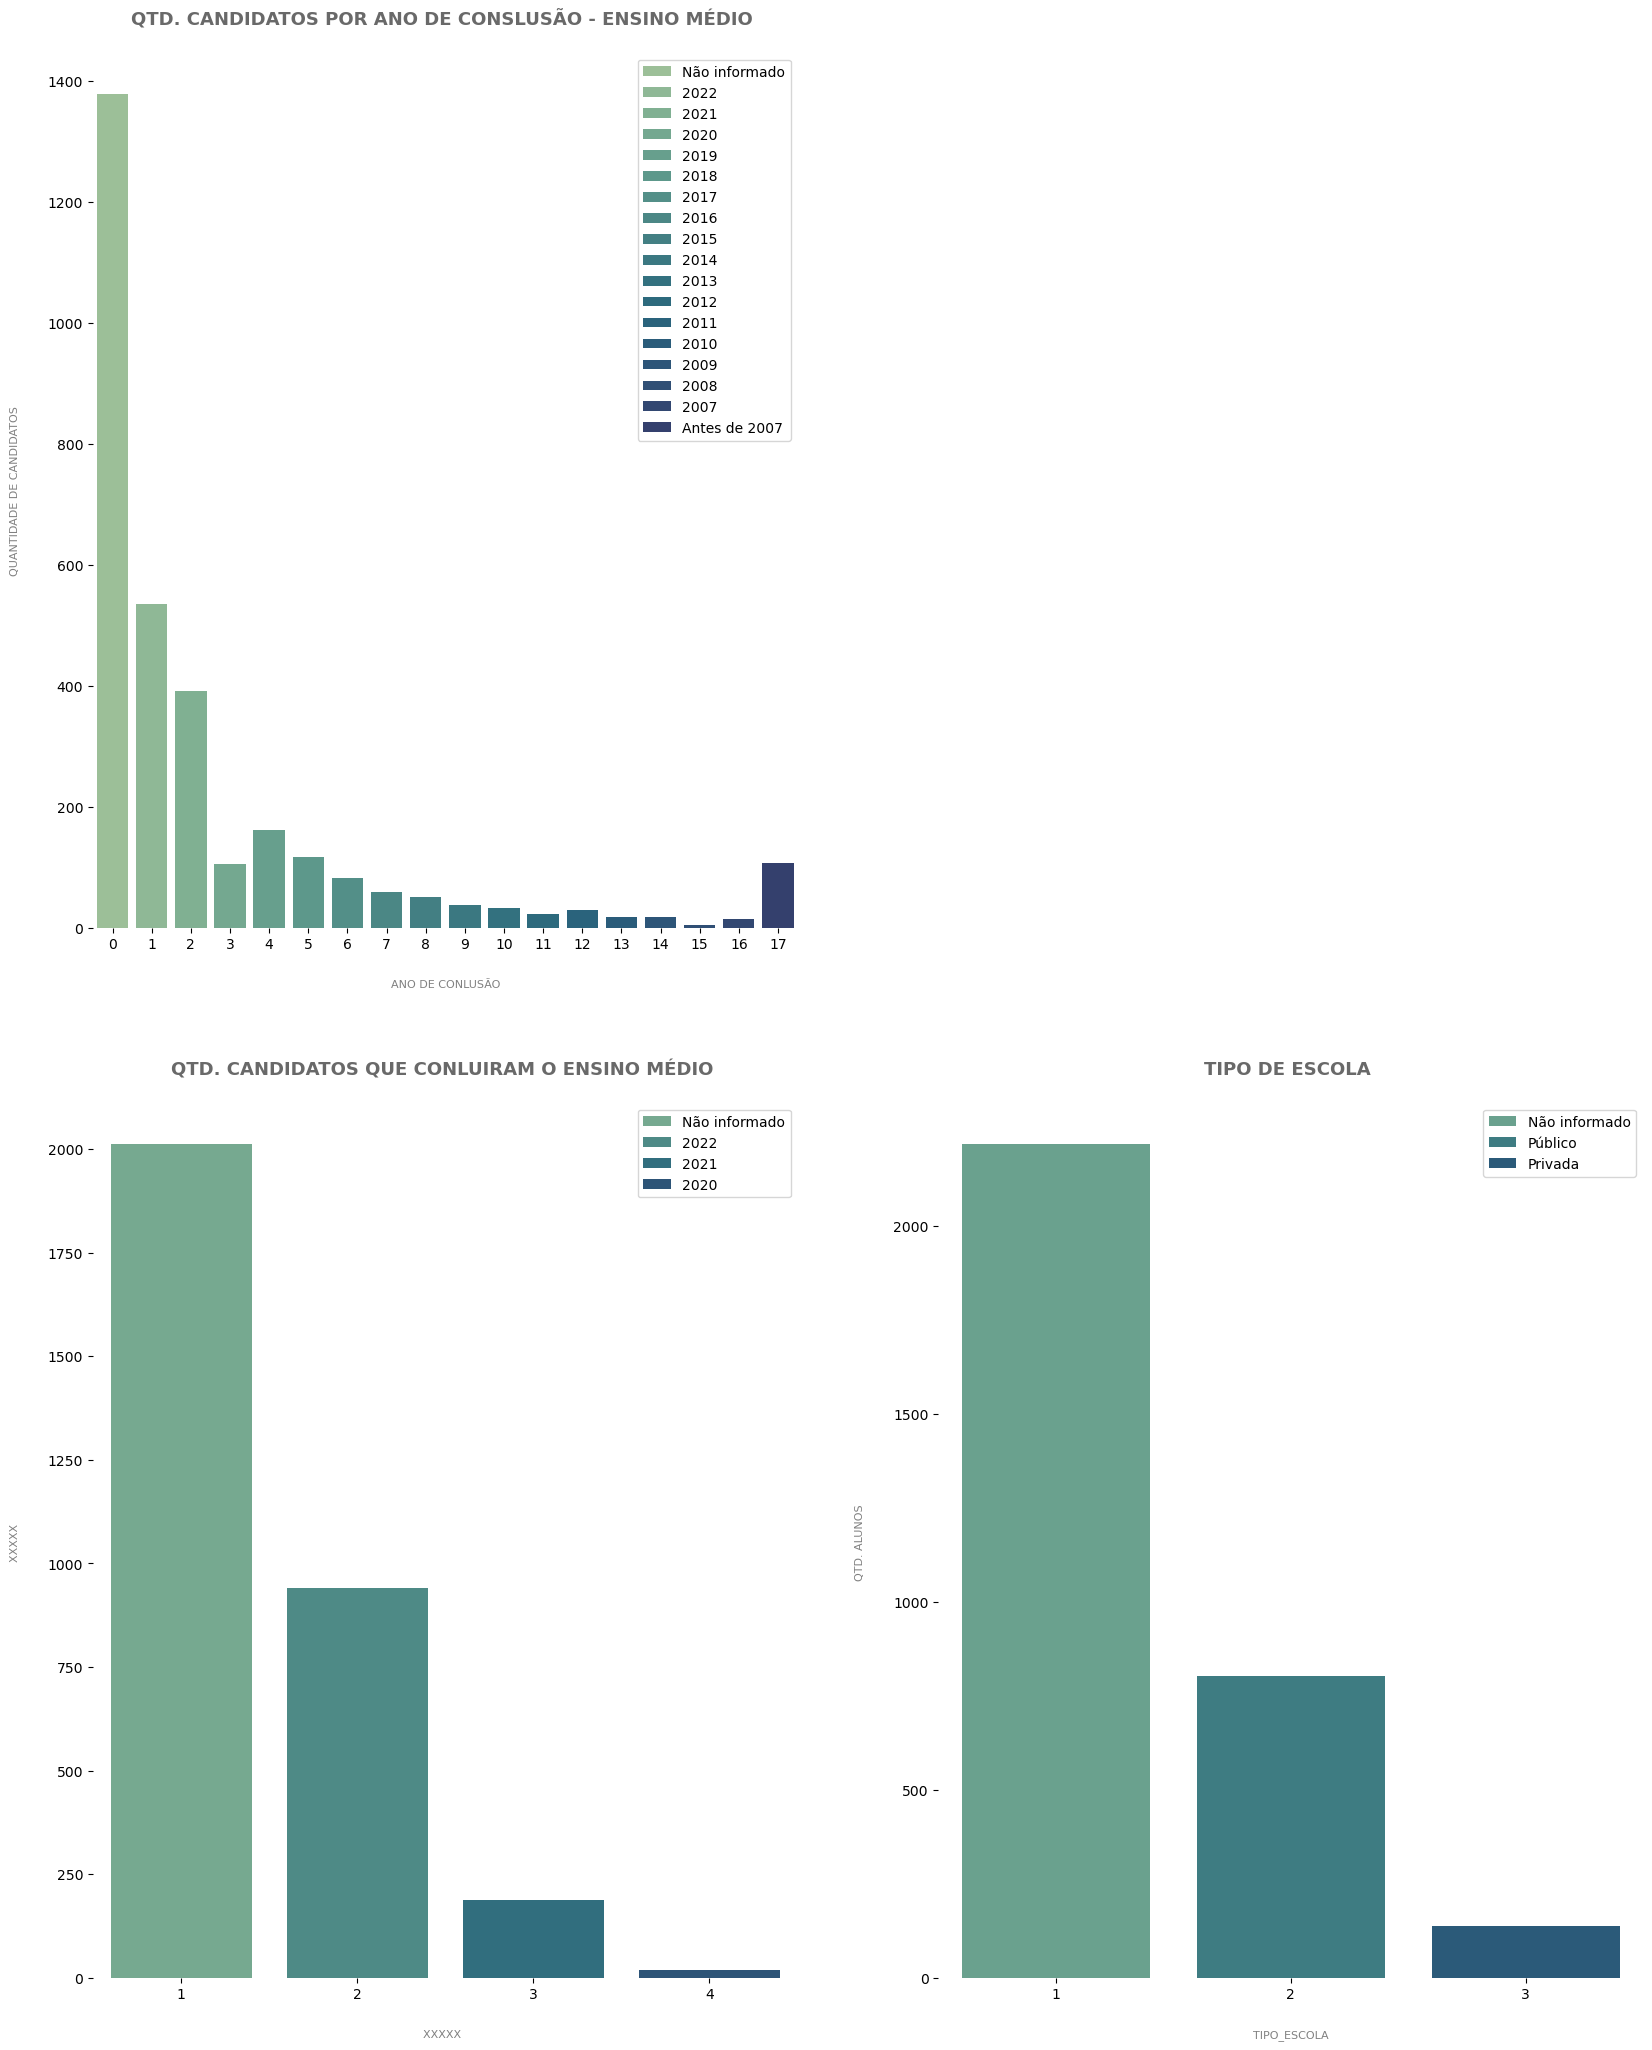

In [28]:
plt.figure(figsize=(20, 25))
ax3 = plt.subplot(2, 2, 1)
ax3 = sns.countplot(x = 'TP_ANO_CONCLUIU', data = df, palette = 'crest', hue = 'TP_ANO_CONCLUIU', dodge = False)
ax3 = plt.title('QTD. CANDIDATOS POR ANO DE CONSLUSÃO - ENSINO MÉDIO ', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax3 = sns.despine(bottom = True, left=True)
ax3 = plt.xlabel('ANO DE CONLUSÃO', color = 'grey', labelpad = 20, fontsize = 8)
ax3 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax3 = plt.legend(loc = 1, labels=['Não informado','2022','2021', '2020', '2019','2018','2017',
                                  '2016','2015','2014','2013','2012','2011','2010','2009','2008',
                                  '2007','Antes de 2007'
                                  ])

#############
# Somente quem Concluiu o ensino médio
df_concluiu= df[df['TP_ST_CONCLUSAO']==1]
df_concluiu
ax4 = plt.subplot(2, 2, 3)
ax4 = sns.countplot(x = 'TP_ST_CONCLUSAO', data = df, palette = 'crest', hue = 'TP_ST_CONCLUSAO', dodge = False)
ax4 = plt.title('QTD. CANDIDATOS QUE CONLUIRAM O ENSINO MÉDIO ', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax4 = sns.despine(bottom = True, left=True)
ax4 = plt.xlabel('XXXXX  ', color = 'grey', labelpad = 20, fontsize = 8)
ax4 = plt.ylabel('XXXXX ', color = 'grey', labelpad = 20, fontsize = 8)
ax4 = plt.legend(loc = 1, labels=['Não informado','2022','2021', '2020', '2019','2018','2017',
                                  '2016','2015','2014','2013','2012','2011','2010','2009','2008',
                                  '2007','Antes de 2007'
                                  ])

####################
# Tipo de Ensino
ax4 = plt.subplot(2, 2, 4)
ax4 = sns.countplot(x = 'TP_ESCOLA', data = df, palette = 'crest', hue = 'TP_ESCOLA', dodge = False)
ax4 = plt.title('TIPO DE ESCOLA ', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax4 = sns.despine(bottom = True, left=True)
ax4 = plt.xlabel('TIPO_ESCOLA', color = 'grey', labelpad = 20, fontsize = 8)
ax4 = plt.ylabel('QTD. ALUNOS ', color = 'grey', labelpad = 20, fontsize = 8)
ax4 = plt.legend(loc = 1, labels=['Não informado', 'Público', 'Privada'
                                  ])


## RAÇA

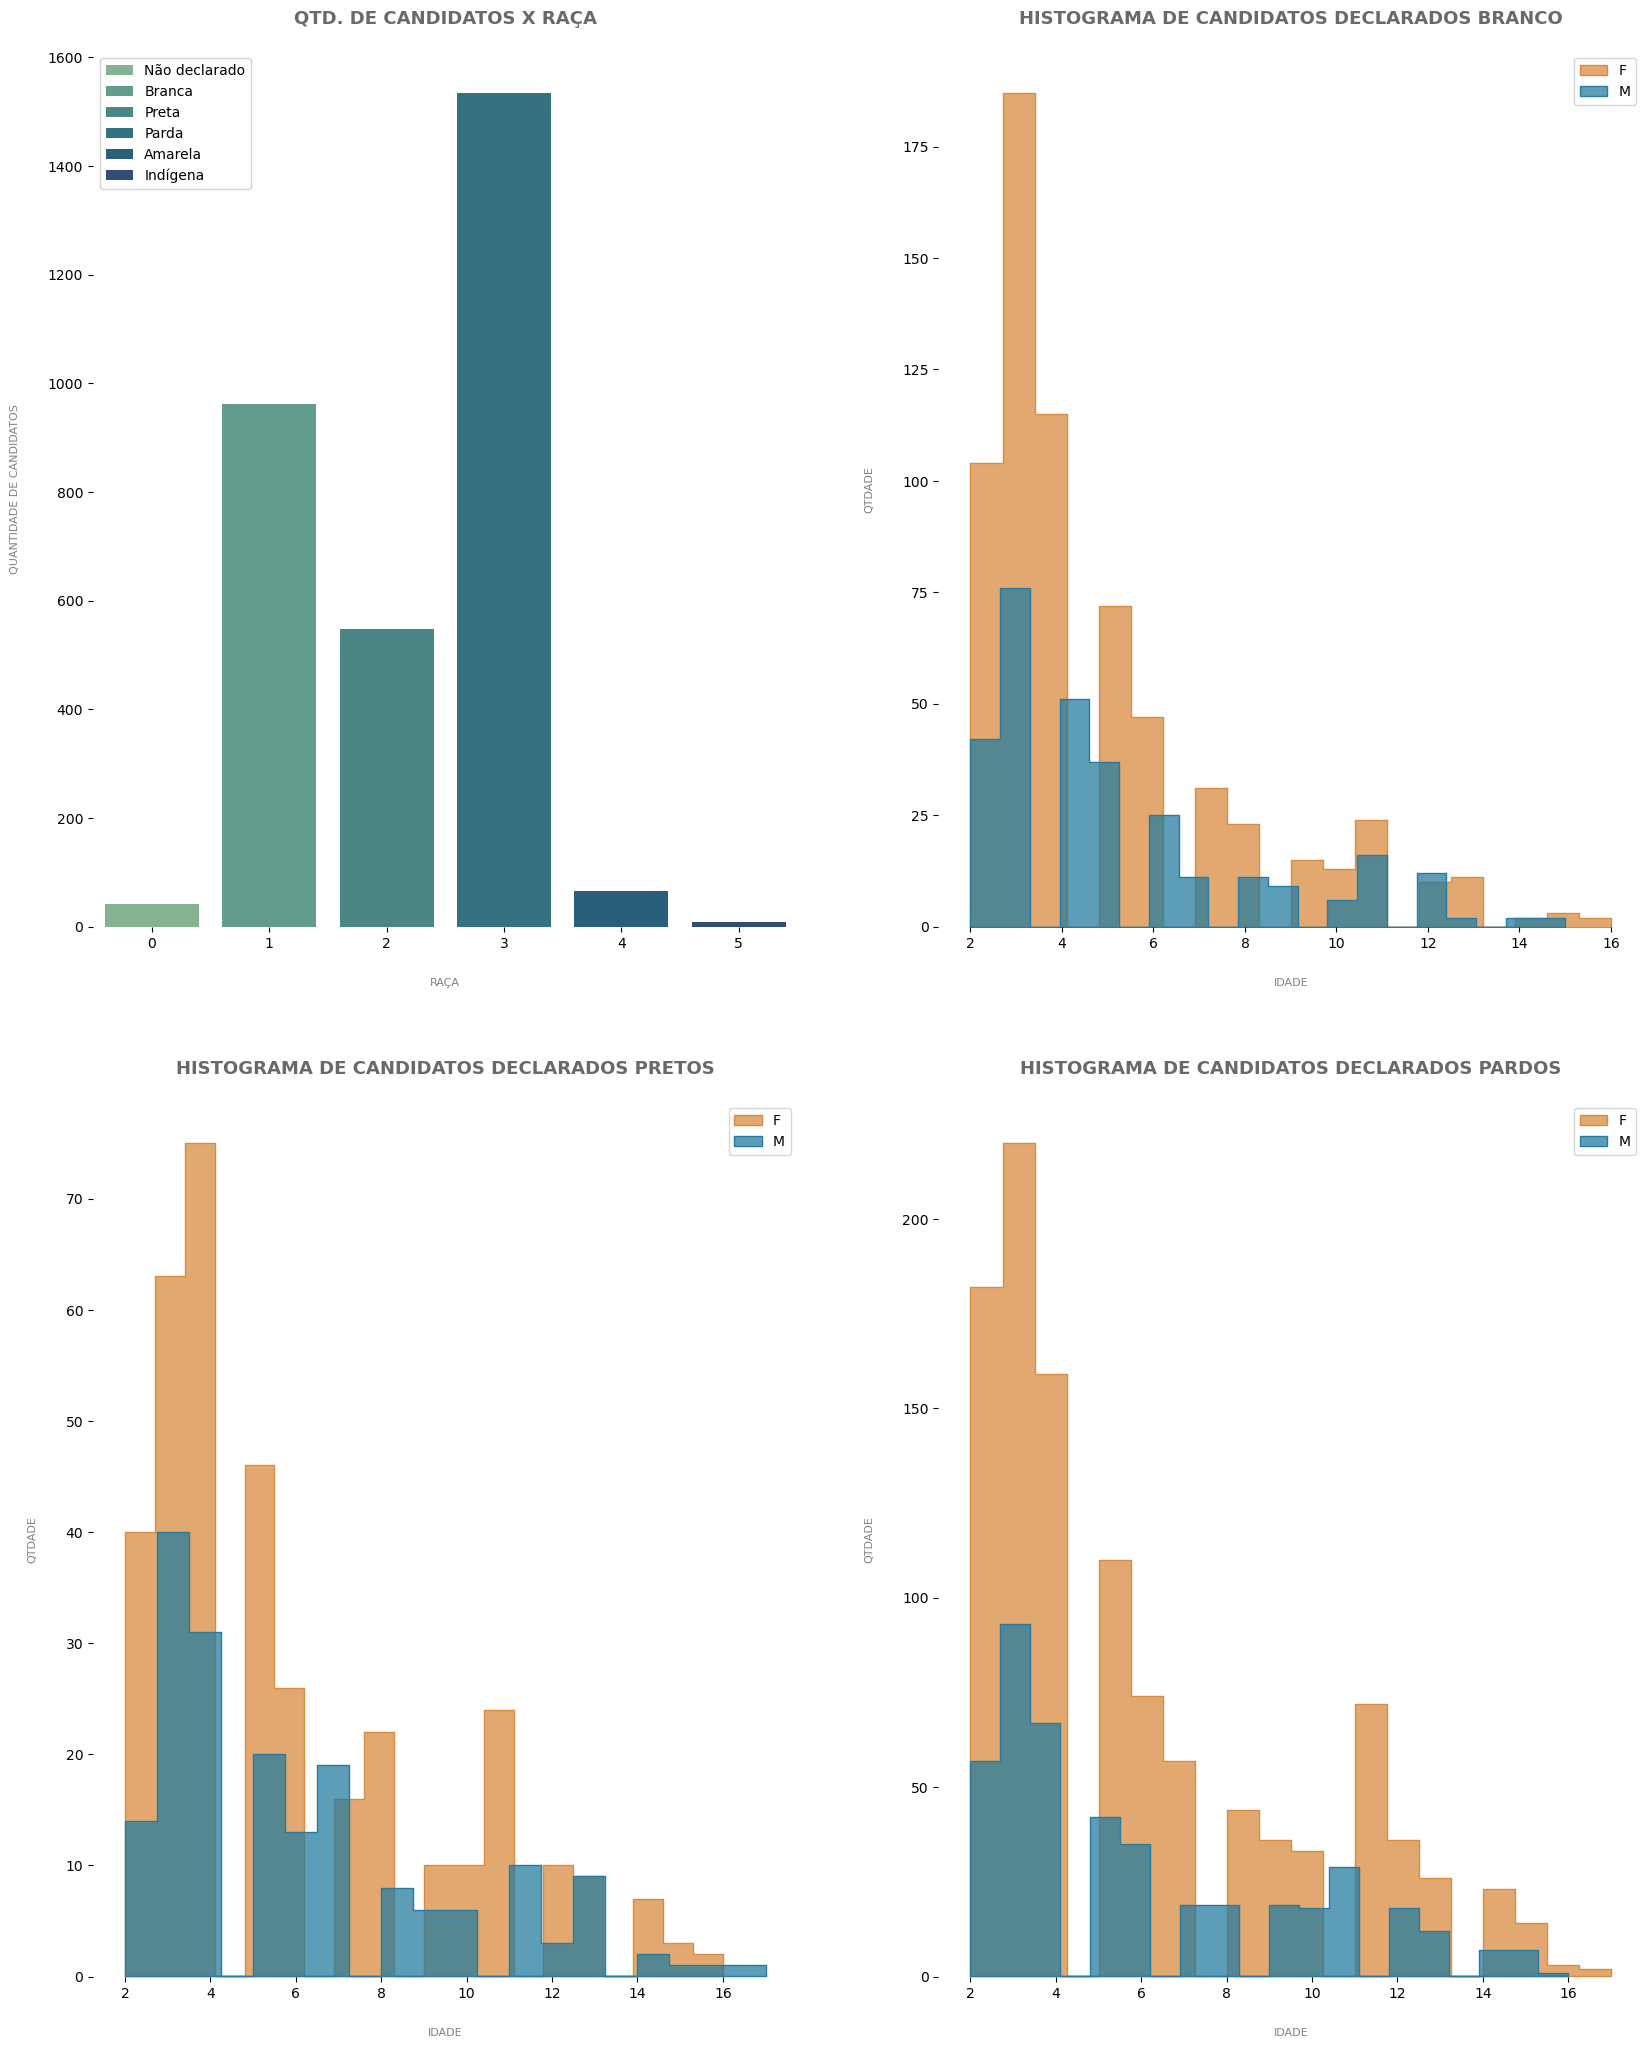

In [29]:
plt.figure (figsize=(20,25))
s3 = plt.subplot(2,2,1)
s3 = sns.countplot(x = 'TP_COR_RACA', data = df,
                    palette = 'crest', hue = 'TP_COR_RACA', dodge = False)
s3 = plt.title('QTD. DE CANDIDATOS X RAÇA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('RAÇA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc = 2, labels = ['Não declarado','Branca','Preta','Parda','Amarela',
                                   'Indígena','Não dispõe da informação'
])

############
raca = df[df['TP_COR_RACA'] == 1]
raca
s2 = plt.subplot(2, 2, 2)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['TP_FAIXA_ETARIA'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['TP_FAIXA_ETARIA'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS BRANCO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


##############

raca = df[df['TP_COR_RACA'] == 2]
raca
s2 = plt.subplot(2, 2, 3)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['TP_FAIXA_ETARIA'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['TP_FAIXA_ETARIA'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS PRETOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

##############

raca = df[df['TP_COR_RACA'] == 3]
raca
s2 = plt.subplot(2, 2, 4)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['TP_FAIXA_ETARIA'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['TP_FAIXA_ETARIA'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS PARDOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

**CONCLUSÃO**
1. Predominância de Candidatos Pardos:
A maior parte dos candidatos se autodeclara parda, seguida por candidatos brancos e pretos. Grupos como amarelos, indígenas e não declarados representam uma minoria.

2. Distribuição por Gênero nas Raças:
* Em todas as raças analisadas (branca, preta e parda), as mulheres são maioria em relação aos homens.
* A maior concentração de candidatas está na faixa etária entre 17 e 18 anos, como também observado na análise geral anterior.

3. Candidatos Brancos:
A distribuição etária de candidatos brancos mostra uma participação maior de mulheres, principalmente nas idades mais baixas (entre 17 e 18 anos), com a quantidade diminuindo nas faixas mais altas.

4. Candidatos Pretos:
Também apresentam predominância feminina, mas com menor volume em relação aos brancos e pardos.

5. Candidatos Pardos:
Apresentam o maior volume absoluto, com ampla maioria de mulheres jovens. Isso reforça a tendência de participação feminina mais expressiva nessa amostra.

## Notas

In [30]:
df[['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']].max()

NU_NOTA_MT         9021.0
NU_NOTA_LC         7558.0
NU_NOTA_CH         7835.0
NU_NOTA_CN         8211.0
NU_NOTA_REDACAO     980.0
dtype: float64

**As notas estão em uma escala de 0 a 10000, mas o ENEM utiliza uma escala de 0 a 100.**

NOTAS SENDO MULTIPLICADAS POR 10

In [31]:
#CORRINDO AS NOTAS
# As notas estão em uma escala de 0 a 10000, mas o ENEM utiliza uma escala de 0 a 100.
colunas_notas = ['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN']
for coluna in colunas_notas:
    df[coluna] = df[coluna] / 10
df[colunas_notas].max()

NU_NOTA_MT    902.1
NU_NOTA_LC    755.8
NU_NOTA_CH    783.5
NU_NOTA_CN    821.1
dtype: float64

In [37]:
# Agora sim
df[['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']].max()

NU_NOTA_MT         902.1
NU_NOTA_LC         755.8
NU_NOTA_CH         783.5
NU_NOTA_CN         821.1
NU_NOTA_REDACAO    980.0
dtype: float64

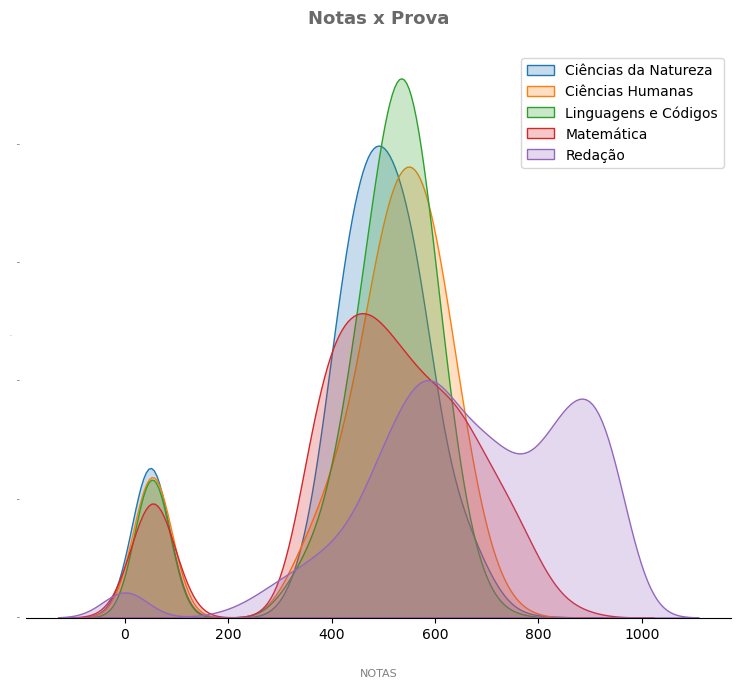

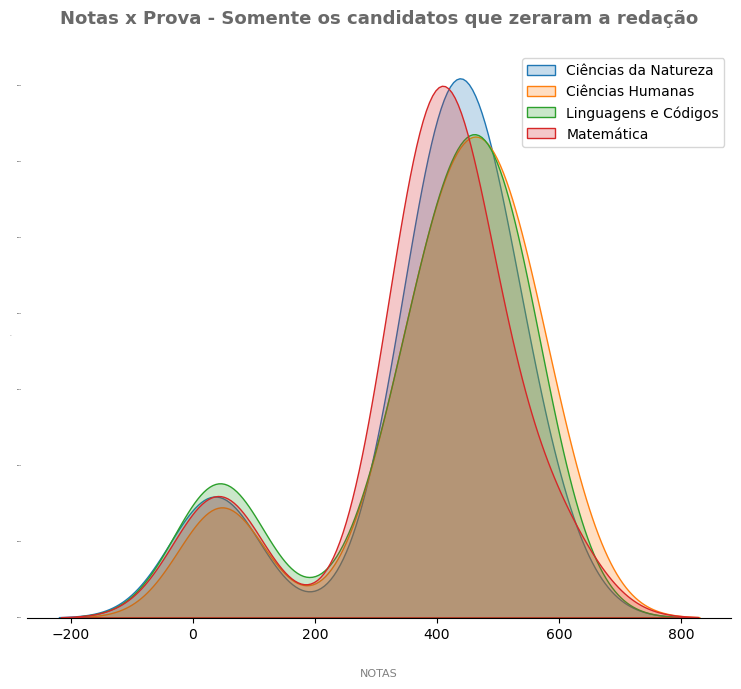

In [52]:
plt.figure(figsize=(20,25))
ax5 = plt.subplot(3,2,1)

sns.kdeplot(df['NU_NOTA_CN'], label = 'Ciências da Natureza', shade = True)
sns.kdeplot(df['NU_NOTA_CH'], label = 'Ciências Humanas', shade = True)
sns.kdeplot(df['NU_NOTA_LC'], label = 'Linguagens e Códigos', shade = True)
sns.kdeplot(df['NU_NOTA_MT'], label = 'Matemática', shade = True)
sns.kdeplot(df['NU_NOTA_REDACAO'], label = 'Redação', shade = True)

plt.title('Notas x Prova', pad = 20, fontsize = 13,
          color = 'dimgrey', fontweight = 'bold')
sns.despine(bottom = False, left= True)
plt.xlabel('NOTAS', color = 'grey', labelpad = 20, fontsize = 8 )
plt.ylabel([], fontsize = 0)
ax5.tick_params(axis= 'y', labelsize = 0, length = 0)
ax5.legend()

#################
# Só quem zerou a redação
plt.figure(figsize=(20,25))
ax5 = plt.subplot(3,2,2)

sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_CN'], label = 'Ciências da Natureza', shade = True)
sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_CH'], label = 'Ciências Humanas', shade = True)
sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_LC'], label = 'Linguagens e Códigos', shade = True)
sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_MT'], label = 'Matemática', shade = True)

plt.title('Notas x Prova - Somente os candidatos que zeraram a redação', pad = 20, fontsize = 13,
          color = 'dimgrey', fontweight = 'bold')
sns.despine(bottom = False, left= True)
plt.xlabel('NOTAS', color = 'grey', labelpad = 20, fontsize = 8 )
plt.ylabel([], fontsize = 0)
ax5.tick_params(axis= 'y', labelsize = 0, length = 0)
ax5.legend()

**CONCLUSÃO**

1. Distribuição Geral das Notas (Todos os Candidatos):
A maioria das notas está concentrada entre 400 e 600 pontos.
A Redação apresenta uma distribuição mais dispersa, com uma quantidade considerável de candidatos zerando e outros alcançando pontuações muito altas, o que mostra uma grande variação de desempenho nessa área.
As outras áreas (Ciências da Natureza, Humanas, Linguagens e Matemática) apresentam curvas mais concentradas e simétricas.

2. Notas dos Candidatos que Zeraram a Redação:
Mesmo entre os que zeraram a redação, o desempenho nas demais áreas se mantém na faixa entre 400 e 600 pontos, ou seja, zerar a redação não significa baixo desempenho nas provas objetivas.
Isso indica que a Redação é um ponto crítico: candidatos com bom desempenho nas áreas objetivas ainda podem ser penalizados significativamente por um zero na redação.

## **Formulação das Hipóteses**